# GAN_2D_Example

In [17]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn, optim
from torch.autograd import Variable

## Prepare Data

Text(0,0.5,'y1')

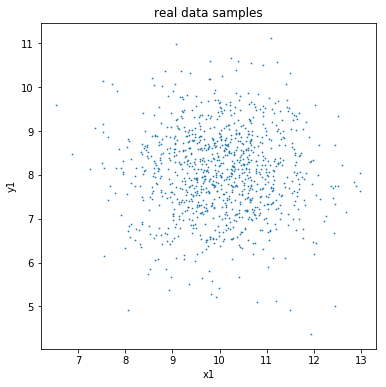

In [18]:
def sample_real(batch_size=100):
    x = torch.randn(batch_size, 2)   # x ~ N(mu=0,std=1)
    x[:,0] += 10
    x[:,1] += 8
    return x

plt.figure(figsize=[6,6])
x = sample_real(1000).numpy()
plt.scatter(x[:,0],x[:,1],0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

## Define GAN model

In [22]:
# Discriminator
D = nn.Sequential(
    nn.Linear(2, 10),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(10, 1))
    #,
    #nn.Sigmoid())

# Generator
z_dim = 10
G = nn.Sequential(
    nn.Linear(z_dim, 20),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(20, 2))

D.cuda()
G.cuda()

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=20, out_features=2, bias=True)
)

## Training GAN Model

In [20]:
batch_size = 300

#a helper function to plot results
def plot_decoder():
    plt.figure(figsize=[5,5])

    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    x_gen = G(z).detach().cpu().numpy()
    
    plt.scatter(x_gen[:,0],x_gen[:,1],0.8)
    
    x_real = sample_real(batch_size).numpy()
    plt.scatter(x_real[:,0],x_real[:,1],0.8)
    plt.legend(['GAN','Real Data'])
    
    plt.xlim([-1,11])
    plt.ylim([-1,11])
    return x_gen.mean(0), x_gen.std(0)

In [23]:
max_epoch = 100000

# Binary cross entropy loss and optimizer
#criterion = nn.BCELoss()
criterion = nn.MSELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0001)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/100000], d_loss: 5.3068, g_loss: 1.1977, D(x): -1.30, D(G(z)): -0.09


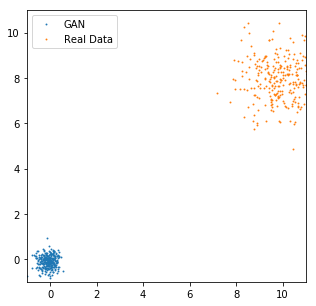

mean=[-0.08419118 -0.09347086], std=[0.25110182 0.2635139 ]
Epoch [500/100000], d_loss: 0.4812, g_loss: 0.7134, D(x): 0.34, D(G(z)): 0.16


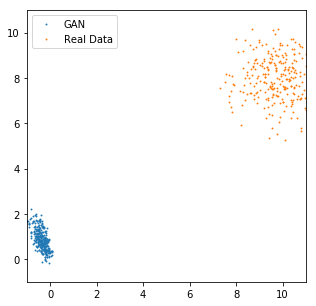

mean=[-0.3766629  0.8655472], std=[0.21604048 0.46384475]
Epoch [1000/100000], d_loss: 0.2081, g_loss: 0.3761, D(x): 0.85, D(G(z)): 0.40


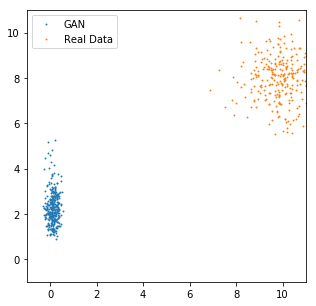

mean=[0.11724673 2.282932  ], std=[0.16896488 0.7369881 ]
Epoch [1500/100000], d_loss: 0.1864, g_loss: 0.3819, D(x): 0.89, D(G(z)): 0.40


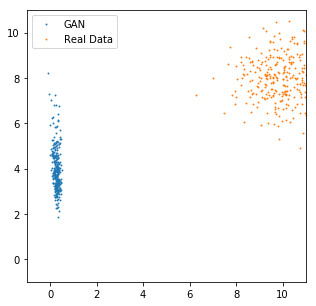

mean=[0.26379144 3.9663973 ], std=[0.10082216 0.9620077 ]
Epoch [2000/100000], d_loss: 0.0758, g_loss: 0.5972, D(x): 0.91, D(G(z)): 0.23


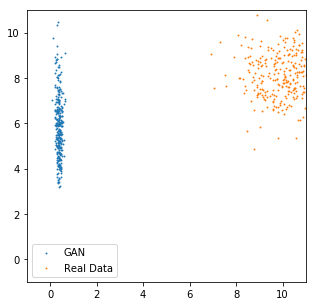

mean=[0.37586766 5.8755355 ], std=[0.08603504 1.3577121 ]
Epoch [2500/100000], d_loss: 0.0323, g_loss: 0.7951, D(x): 0.94, D(G(z)): 0.11


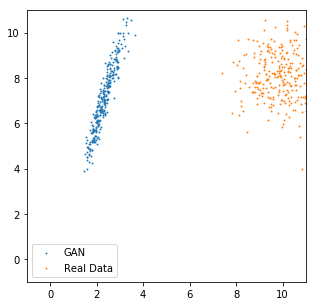

mean=[2.3199728 7.1106553], std=[0.4347225 1.5001664]
Epoch [3000/100000], d_loss: 0.1951, g_loss: 0.4803, D(x): 0.76, D(G(z)): 0.32


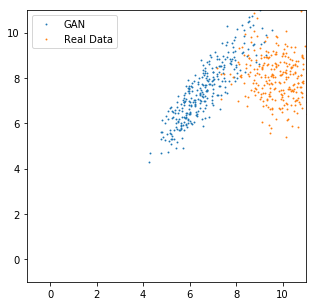

mean=[6.6966124 7.573416 ], std=[1.1654308 1.5320098]
Epoch [3500/100000], d_loss: 0.6251, g_loss: 0.2234, D(x): 0.46, D(G(z)): 0.55


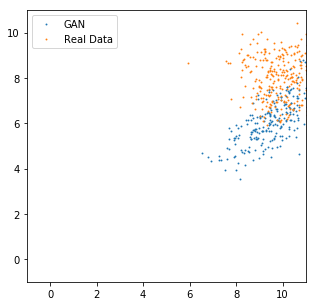

mean=[10.276423  6.659255], std=[1.7326274 1.4662241]
Epoch [4000/100000], d_loss: 0.6217, g_loss: 0.2570, D(x): 0.40, D(G(z)): 0.50


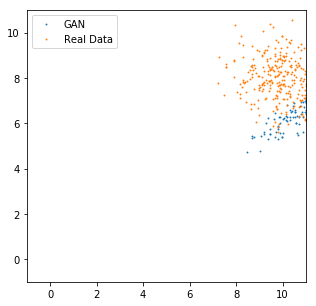

mean=[12.562579   7.7175846], std=[2.0666292 1.5186106]
Epoch [4500/100000], d_loss: 0.6785, g_loss: 0.2968, D(x): 0.34, D(G(z)): 0.47


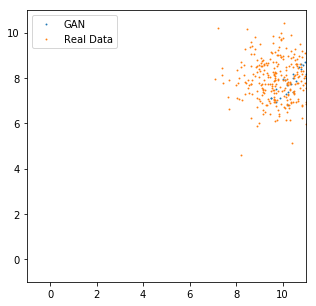

mean=[14.117915 10.862925], std=[2.199784  1.8950088]
Epoch [5000/100000], d_loss: 0.7160, g_loss: 0.3202, D(x): 0.28, D(G(z)): 0.44


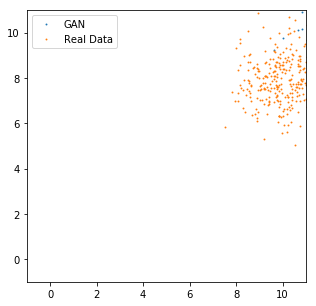

mean=[14.8013   14.514396], std=[2.302155  2.3906717]
Epoch [5500/100000], d_loss: 0.7116, g_loss: 0.3448, D(x): 0.27, D(G(z)): 0.41


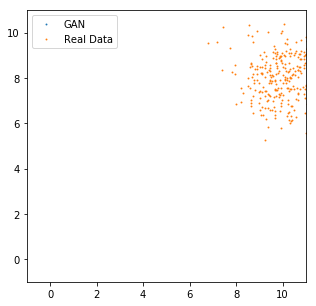

mean=[18.139801 13.842576], std=[3.0316317 2.5029716]
Epoch [6000/100000], d_loss: 0.6059, g_loss: 0.4130, D(x): 0.31, D(G(z)): 0.36


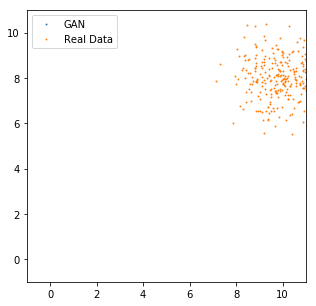

mean=[19.409195  15.5349655], std=[3.25035   2.7763147]
Epoch [6500/100000], d_loss: 0.5259, g_loss: 0.4459, D(x): 0.36, D(G(z)): 0.33


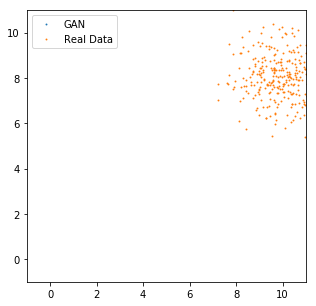

mean=[18.52328  17.092672], std=[2.9489493 2.8928213]
Epoch [7000/100000], d_loss: 0.4731, g_loss: 0.4658, D(x): 0.39, D(G(z)): 0.32


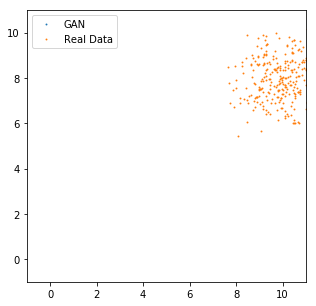

mean=[20.033628 14.237723], std=[3.0818677 2.4082031]
Epoch [7500/100000], d_loss: 0.4509, g_loss: 0.4369, D(x): 0.42, D(G(z)): 0.34


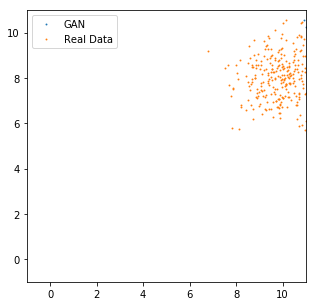

mean=[16.319572 15.954378], std=[2.4772956 2.5688038]
Epoch [8000/100000], d_loss: 0.4640, g_loss: 0.3989, D(x): 0.43, D(G(z)): 0.37


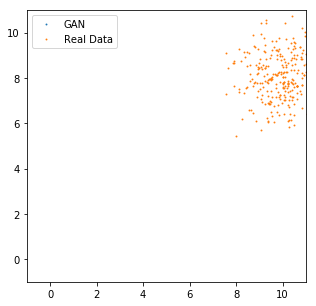

mean=[16.515316 11.599679], std=[2.2711673 1.7576683]
Epoch [8500/100000], d_loss: 0.5011, g_loss: 0.3226, D(x): 0.44, D(G(z)): 0.43


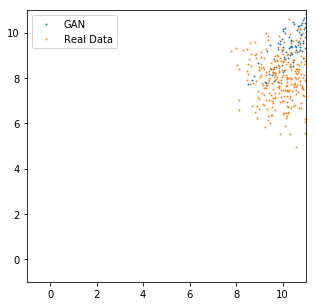

mean=[12.365333 11.307161], std=[1.8032408 1.847286 ]
Epoch [9000/100000], d_loss: 0.4838, g_loss: 0.2742, D(x): 0.50, D(G(z)): 0.47


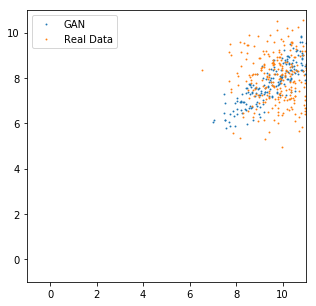

mean=[10.678928  8.684093], std=[1.7997456 1.4959357]
Epoch [9500/100000], d_loss: 0.4768, g_loss: 0.2488, D(x): 0.54, D(G(z)): 0.51


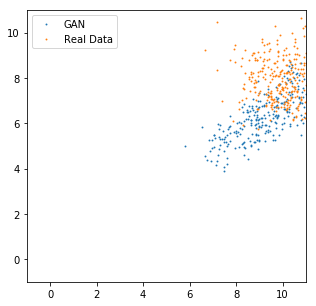

mean=[9.641329  6.5864844], std=[1.5968535 1.2207129]
Epoch [10000/100000], d_loss: 0.5041, g_loss: 0.1959, D(x): 0.56, D(G(z)): 0.56


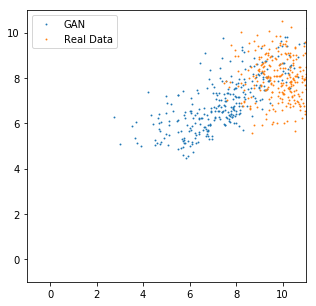

mean=[7.4407578 6.949554 ], std=[1.6795902 1.284051 ]
Epoch [10500/100000], d_loss: 0.5145, g_loss: 0.1932, D(x): 0.55, D(G(z)): 0.56


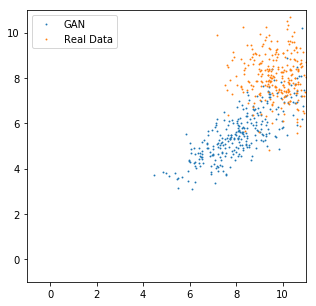

mean=[8.367626  5.6988115], std=[1.6010963 1.2462628]
Epoch [11000/100000], d_loss: 0.5162, g_loss: 0.2095, D(x): 0.53, D(G(z)): 0.54


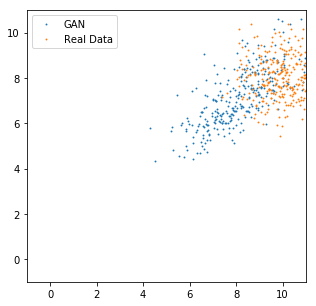

mean=[8.188287  7.2011304], std=[1.4261687 1.3106333]
Epoch [11500/100000], d_loss: 0.5183, g_loss: 0.2452, D(x): 0.49, D(G(z)): 0.50


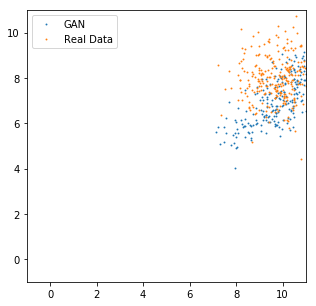

mean=[10.443946   7.4629173], std=[1.5532651 1.3631852]
Epoch [12000/100000], d_loss: 0.5041, g_loss: 0.2722, D(x): 0.48, D(G(z)): 0.48


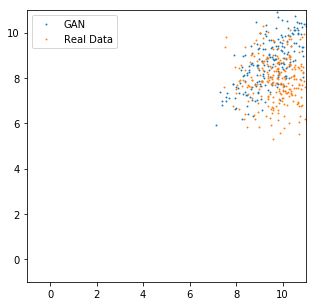

mean=[10.31313   9.673969], std=[1.6047508 1.9158112]
Epoch [12500/100000], d_loss: 0.4760, g_loss: 0.2816, D(x): 0.50, D(G(z)): 0.47


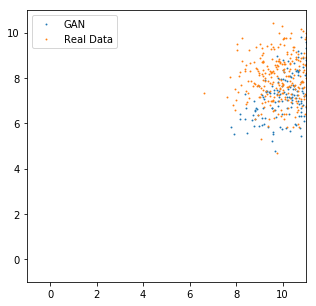

mean=[11.42942   8.059115], std=[1.7064476 1.5863398]
Epoch [13000/100000], d_loss: 0.4837, g_loss: 0.2561, D(x): 0.52, D(G(z)): 0.50


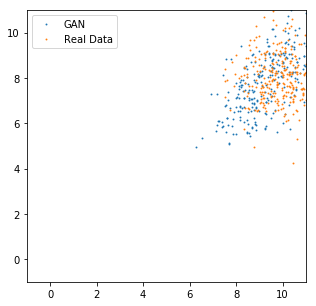

mean=[9.67135  8.213334], std=[1.4473175 1.6700289]
Epoch [13500/100000], d_loss: 0.5061, g_loss: 0.2374, D(x): 0.51, D(G(z)): 0.51


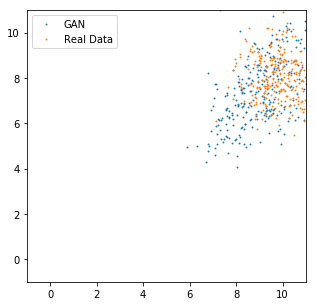

mean=[9.247906  7.5723696], std=[1.4422145 1.6074095]
Epoch [14000/100000], d_loss: 0.5081, g_loss: 0.2490, D(x): 0.49, D(G(z)): 0.50


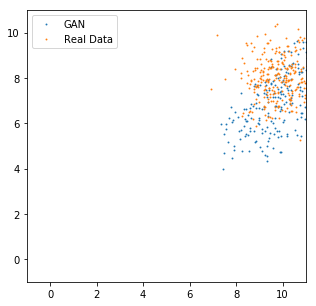

mean=[10.588695  7.511517], std=[1.6544901 1.7114303]
Epoch [14500/100000], d_loss: 0.4888, g_loss: 0.2631, D(x): 0.50, D(G(z)): 0.49


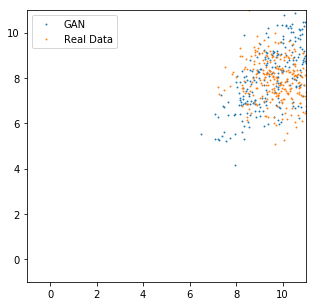

mean=[10.040078  8.662673], std=[1.5018305 1.9028765]
Epoch [15000/100000], d_loss: 0.5079, g_loss: 0.2421, D(x): 0.50, D(G(z)): 0.51


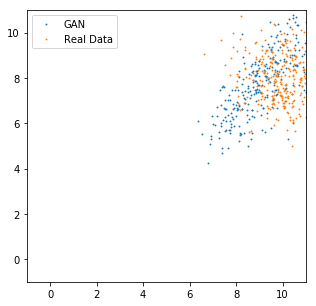

mean=[9.449363 8.148063], std=[1.5623465 1.8587255]
Epoch [15500/100000], d_loss: 0.4917, g_loss: 0.2618, D(x): 0.50, D(G(z)): 0.49


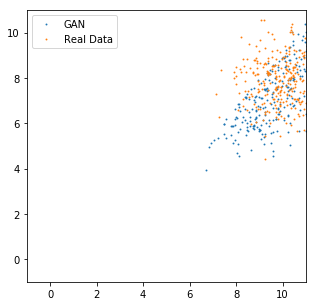

mean=[10.251873  7.756472], std=[1.7099243 1.9564668]
Epoch [16000/100000], d_loss: 0.4993, g_loss: 0.2492, D(x): 0.50, D(G(z)): 0.50


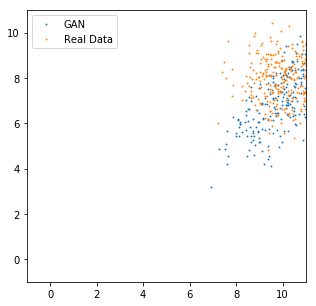

mean=[10.620314   7.6004543], std=[1.6805221 1.7906373]
Epoch [16500/100000], d_loss: 0.5092, g_loss: 0.2444, D(x): 0.50, D(G(z)): 0.51


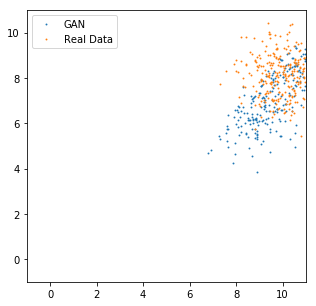

mean=[10.209244   7.6559205], std=[1.588457 1.763788]
Epoch [17000/100000], d_loss: 0.5006, g_loss: 0.2538, D(x): 0.50, D(G(z)): 0.50


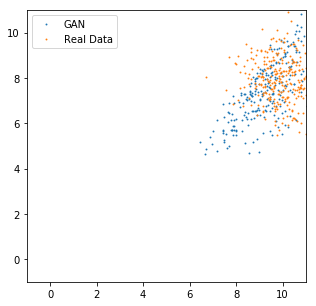

mean=[9.859394 8.060384], std=[1.5950934 1.9228277]
Epoch [17500/100000], d_loss: 0.4891, g_loss: 0.2503, D(x): 0.51, D(G(z)): 0.50


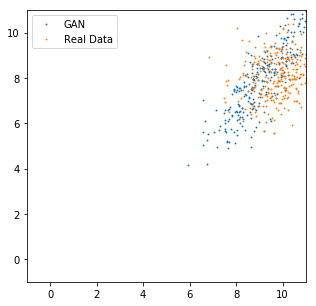

mean=[9.465082 8.29399 ], std=[1.4766922 1.8751249]
Epoch [18000/100000], d_loss: 0.5111, g_loss: 0.2448, D(x): 0.50, D(G(z)): 0.51


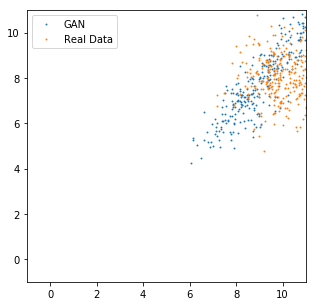

mean=[9.326262 8.140799], std=[1.5619497 1.9132676]
Epoch [18500/100000], d_loss: 0.5016, g_loss: 0.2499, D(x): 0.50, D(G(z)): 0.50


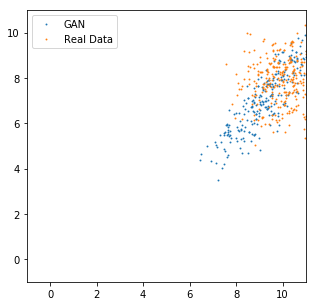

mean=[9.773114 7.680921], std=[1.567743  1.8750389]


KeyboardInterrupt: 

In [24]:
for epoch in range(max_epoch):
    
    # Build mini-batch dataset
    x = Variable(sample_real(batch_size)).cuda()

    # Create the labels which are later used as input for the BCE loss
    real_labels = Variable(torch.ones(batch_size,1)).cuda()
    fake_labels = Variable(torch.zeros(batch_size,1)).cuda()


    #============= Train the discriminator =============#
    # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
    # Second term of the loss is always zero since real_labels == 1    
    outputs = D(x)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Compute BCELoss using fake images
    # First term of the loss is always zero since fake_labels == 0    
    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    fake_images = G(z).detach()
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Backprop + Optimize
    d_loss = d_loss_real + d_loss_fake
    D.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    #=============== Train the generator ===============#
    z = Variable(torch.randn(batch_size, z_dim)).cuda()
    fake_images = G(z)
    outputs = D(fake_images)

    # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
    g_loss = criterion(outputs, real_labels)

    # Backprop + Optimize
    D.zero_grad()
    G.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    if epoch%500==0:
#         print('epoch={}, loss={}'.format(epoch,loss.data.numpy()[0]))
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f'
              %(epoch, max_epoch, d_loss.item(), g_loss.item(), real_score.mean().item(), fake_score.mean().item()))

    if epoch%500==0:
        mean, std = plot_decoder()
        plt.show()
        print('mean={}, std={}'.format(mean, std))
